In [1]:
import numpy as np
import neural_net
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
def call(K, T):
    S=1
    vol = 0.2
    r=0
    d1 = (np.log(S/K) + (r + vol**2/2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return 1*(-K*np.exp(-r*T)*scipy.stats.norm.cdf(d2) + S*scipy.stats.norm.cdf(d1))
f = neural_net.Fn([0.5,0.1],[2,5], call)

In [3]:
training, validation, test = neural_net.load_data(1000,500,500,f)

Epoch 14634 training complete. learning_halve = 2
Epoch 29223 training complete. learning_halve = 2
Epoch 43784 training complete. learning_halve = 2
Epoch 58363 training complete. learning_halve = 2
Epoch 72959 training complete. learning_halve = 2
Epoch 87533 training complete. learning_halve = 2
Epoch 101993 training complete. learning_halve = 2
Epoch 116563 training complete. learning_halve = 2
Epoch 131131 training complete. learning_halve = 2
Epoch 145661 training complete. learning_halve = 2
Epoch 160278 training complete. learning_halve = 2
Epoch 174873 training complete. learning_halve = 2
Epoch 189464 training complete. learning_halve = 2
Epoch 203993 training complete. learning_halve = 2
Epoch 218569 training complete. learning_halve = 2
Epoch 233122 training complete. learning_halve = 2
Epoch 247695 training complete. learning_halve = 2
Epoch 262282 training complete. learning_halve = 2
Epoch 276785 training complete. learning_halve = 2
Epoch 291338 training complete. learn

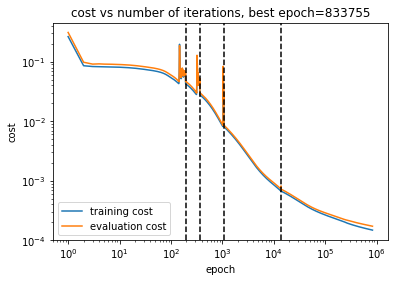

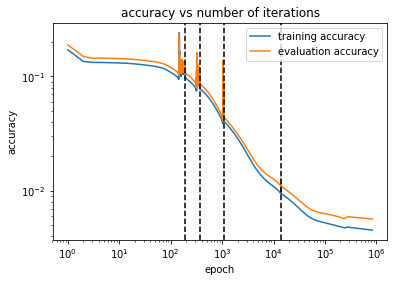

In [9]:
size = [2,10,5,1]
activation_type = ["Sigmoid", "Sigmoid", "Sigmoid"]
net = neural_net.Network(size, activations=activation_type, Fn=f, cost=neural_net.CrossEntropyCost)
eta = 2.0
batch_size = 1000
net.SGD(training, batch_size, eta, mu=0.0, 
         variable_learning=True, evaluation_data=validation, learning_halve=6,
       monitor_evaluation_cost=True, monitor_training_accuracy=True, monitor_evaluation_accuracy=True)

In [10]:
print(net.accuracy(training), net.accuracy(training, flag="Max"))
print(net.accuracy(test), net.accuracy(test, flag="Max"))

0.004542693940764558 0.027594199341462122
0.005451403007481916 0.02609054763201568
